> # 目录

> 一、项目背景 

> 二、数据来源 

> 三、分析思路

> 四、数据的导入与处理

> 五、描述性统计

> 六、用户消费数据分析

>> 6.1 订单商品数量分析

>> 6.2 订单金额分析

>> 6.3 消费趋势分析

>> 6.4 用户的消费金额与数量总览

>> 6.5 用户的消费金额与数量相关分析

>> 6.6 用户消费金额分析

>> 6.7 用户消费数量分析

>> 6.8 用户消费周期分析

>> 6.9 用户分层

>> 6.10 用户复购与回购分析

> 七、结论

# 一、项目背景
CDNOW曾经是一家在线音乐零售平台，后被德国波泰尔斯曼娱乐集团公司出资收购，其资产总价值在最辉煌时曾超过10亿美元。本文主要通过分析CDNow网站的用户购买明细来分析该网站的用户消费行为，使运营部门在营销时更加具有针对性，从而节省成本，提升效率。

# 二、数据来源
本次分析数据来源CDNow网站的用户在1997年1月1日至1998年6月30日期间内购买CD交易明细。

[原始数据下载](https://pan.baidu.com/s/1bRfaBSFBuw0XYkdSATqaQg)--提取码：ren0

数据集中总计有4个字段：用户ID、购买日期、购买日期以及购买数量

# 三、分析思路
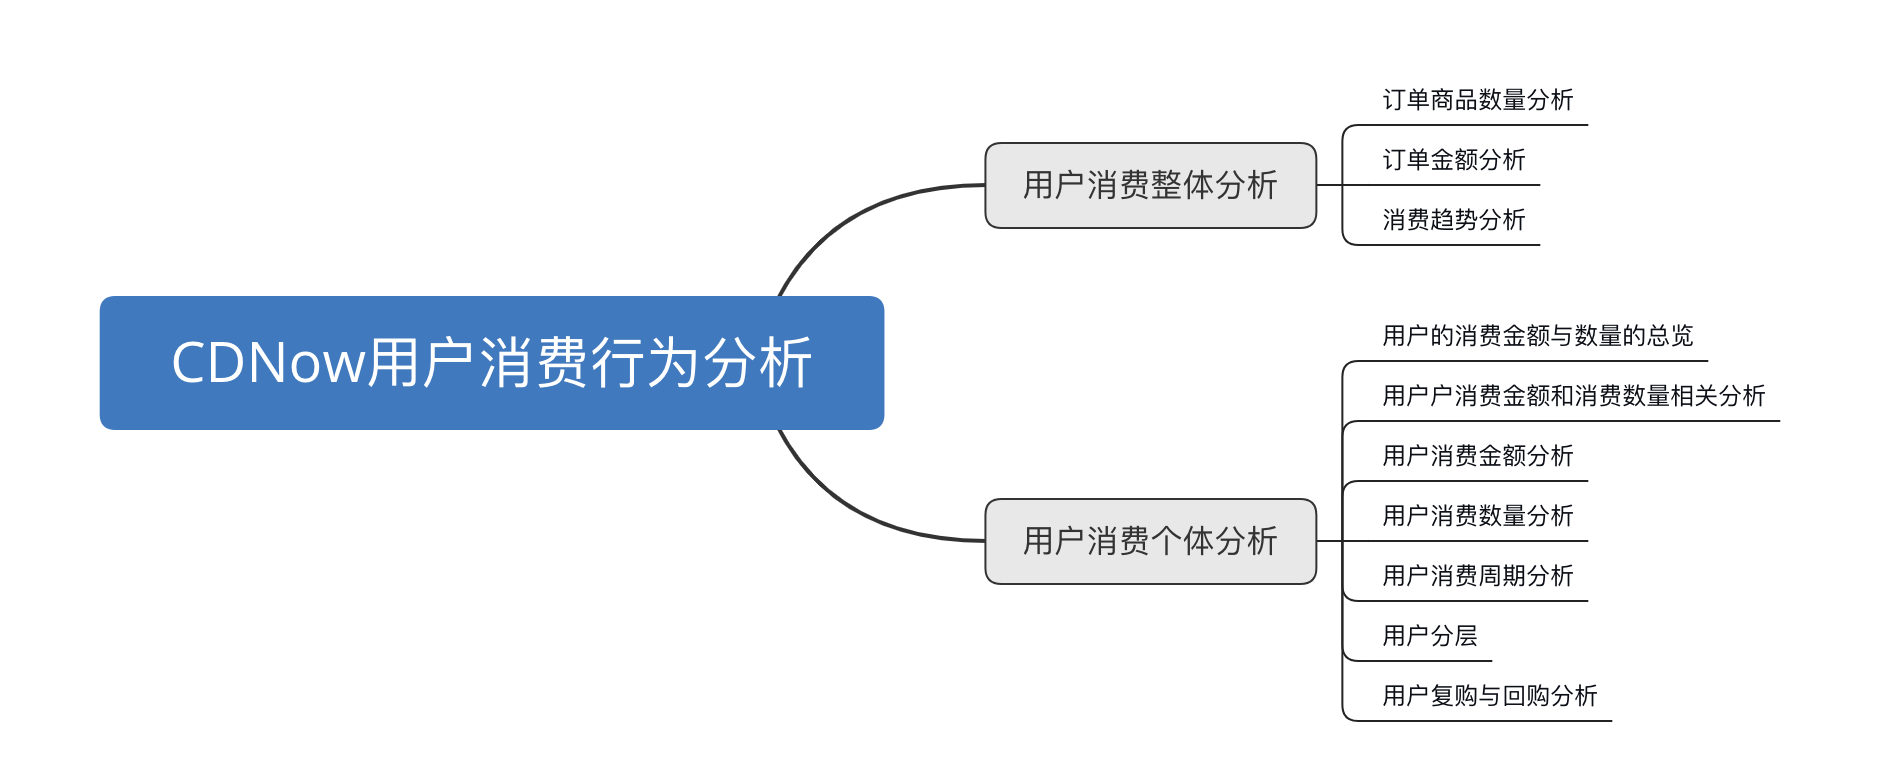

# 四、数据导入与处理

### 4.1 导入常用库

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

###  4.2 导入数据

In [2]:
df = pd.read_csv('CDNOW.txt',names=['user_id','order_date','order_number','order_price'],sep='\s+')
# user_id ：用户id   
# order_date ：购买日期 
# order_number : 购买数量  
# order_price : 购买金额


In [3]:
df.head()  # 查看数据导入情况

,user_id,order_date,order_number,order_price
0,1,19970101,1,11.77
1,2,19970112,1,12.00
2,2,19970112,5,77.00
3,3,19970102,2,20.76
4,3,19970330,2,20.76


In [4]:
# 查看数据类型
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69659 entries, 0 to 69658
Data columns (total 4 columns):
user_id         69659 non-null int64
order_date      69659 non-null int64
order_number    69659 non-null int64
order_price     69659 non-null float64
dtypes: float64(1), int64(3)
memory usage: 2.1 MB


### 4.3 数据处理

In [5]:
# 将order_date字段数据类型修改为datetime类型
df['order_date'] = pd.to_datetime(df['order_date'].astype('str'),format = '%Y-%m-%d')
df['month'] = df.order_date.values.astype('datetime64[M]')


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69659 entries, 0 to 69658
Data columns (total 5 columns):
user_id         69659 non-null int64
order_date      69659 non-null datetime64[ns]
order_number    69659 non-null int64
order_price     69659 non-null float64
month           69659 non-null datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(2)
memory usage: 2.7 MB


In [7]:
df.head()

,user_id,order_date,order_number,order_price,month
0,1,1997-01-01,1,11.77,1997-01-01
1,2,1997-01-12,1,12.00,1997-01-01
2,2,1997-01-12,5,77.00,1997-01-01
3,3,1997-01-02,2,20.76,1997-01-01
4,3,1997-03-30,2,20.76,1997-03-01


In [8]:
# 查看是否有缺失值
df.isnull().sum()

user_id         0
order_date      0
order_number    0
order_price     0
month           0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69659 entries, 0 to 69658
Data columns (total 5 columns):
user_id         69659 non-null int64
order_date      69659 non-null datetime64[ns]
order_number    69659 non-null int64
order_price     69659 non-null float64
month           69659 non-null datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(2)
memory usage: 2.7 MB


- 由结果可见：该数据集不存在缺失值

# 五、描述性统计

In [10]:
df.describe()

,user_id,order_number,order_price
count,69659.000000,69659.000000,69659.000000
mean,11470.854592,2.410040,35.893648
std,6819.904848,2.333924,36.281942
min,1.000000,1.000000,0.000000
25%,5506.000000,1.000000,14.490000
50%,11410.000000,2.000000,25.980000
75%,17273.000000,3.000000,43.700000
max,23570.000000,99.000000,1286.010000


- 该数据集总计有69,659笔订单；
- 每笔订单的商品数量的中位数为2件，最少为1件，最多为99件,但第二个四份位数为3件，可见大部分订单的商品数量较少，仅有少部分订单有较大的交易数量；
- 每笔订单平均花费为35.9元，订单金额的标准差为36.3，可见订单金额的波动较大
- 每笔订单平均花费的最大值为1286.01元，然而最小值却为0元，猜测这部分订单可能是由于订单取消/折扣抵消为0等其他原因，可以考虑将这部分订单数据剔除再进行分析

# 六、用户消费数据分析

### 6.1 订单商品数量分析

In [11]:
number_counts = pd.DataFrame(df['order_number'].value_counts())
number_counts = number_counts.sort_index()
number_counts['percent'] = number_counts['order_number']/number_counts['order_number'].sum()
number_counts.head(10)

,order_number,percent
1,31454,0.451543
2,16070,0.230695
3,9444,0.135575
4,5015,0.071994
5,2792,0.040081
6,1627,0.023357
7,1057,0.015174
8,684,0.009819
9,403,0.005785
10,293,0.004206


In [12]:
number_counts['percent'][:3].sum()

0.8178124865415811

- 商品数量小于等于3件的订单占比达到了82%

### 6.2 订单金额分析

In [13]:
price_counts = pd.DataFrame(pd.cut(df['order_price'],bins=[0,10,20,30,40,50,100,200,300,400,500,600,700,800,900,1000,1100,1200,1300],include_lowest=True).value_counts())
price_counts = price_counts.sort_index()
price_counts['percent'] = price_counts['order_price']/price_counts['order_price'].sum()
price_counts.head(10)

,order_price,percent
"(-0.001, 10.0]",3811,0.054709
"(10.0, 20.0]",24492,0.351599
"(20.0, 30.0]",13438,0.192911
"(30.0, 40.0]",7734,0.111027
"(40.0, 50.0]",6163,0.088474
"(50.0, 100.0]",10869,0.156032
"(100.0, 200.0]",2689,0.038602
"(200.0, 300.0]",343,0.004924
"(300.0, 400.0]",78,0.001120
"(400.0, 500.0]",21,0.000301


In [14]:
price_counts[:5].sum()

order_price    55638.000000
percent            0.798719
dtype: float64

- 0-50元的订单占到近八成

### 6.3 消费趋势分析 

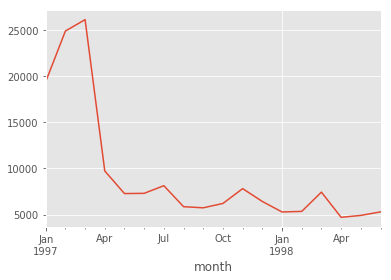

In [15]:
# 订单的商品数量随时间的变化趋势
df.groupby('month').order_number.sum().plot()
plt.show()

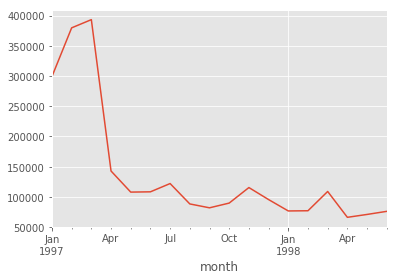

In [16]:
# 订单金额随时间的变化趋势
df.groupby('month').order_price.sum().plot()
plt.show()

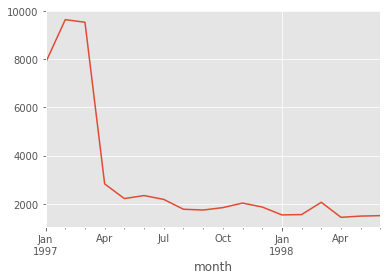

In [17]:
# 唯一user_id随时间的变化趋势
df.groupby('month').user_id.apply(lambda x:len(x.drop_duplicates())).plot()
plt.show()

- 由上述三幅图可知，商品销量、销售金额以及消费人数在一开始有大幅增长，但随着时间的增长，订单大幅下降后趋于稳定，猜测可能是老用户流失较大，新用户增长过低

### 6.4 用户的消费金额与数量总览

In [18]:
user_group = df.groupby('user_id')
user_group.sum().describe()

,order_number,order_price
count,23570.000000,23570.000000
mean,7.122656,106.080426
std,16.983531,240.925195
min,1.000000,0.000000
25%,1.000000,19.970000
50%,3.000000,43.395000
75%,7.000000,106.475000
max,1033.000000,13990.930000


- 每个用户购买数量的均值为7件，而中位数为3件，可见极值影响较为明显；
- 每个用户购买的金额的均值为106.1元，而中位数为43.4元，极值影响也比较明显；
- 总体而言，符合“二八法则”，小部分消费者有着高额的消费。

### 6.5 用户消费金额和消费数量的相关分析

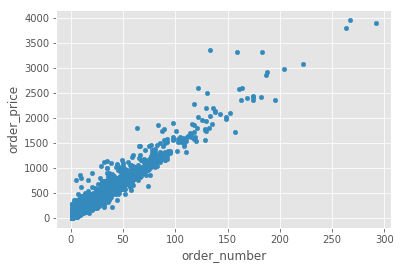

In [19]:
user_group.sum().query('order_price < 4000').plot.scatter(x = 'order_number',y = 'order_price')
plt.show()

- 由散点图可以看出：每个用户的订单数量与订单金额有着较强的线性相关性，可能是由于商品比较单一，异常值也较少

### 6.6 用户消费金额分析

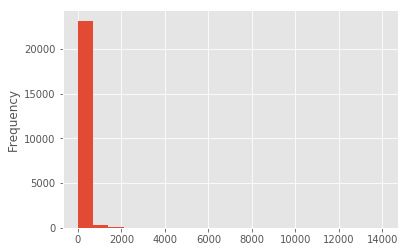

In [20]:
user_group.sum().order_price.plot.hist(bins = 20)
plt.show()

- 极值的干扰较大，应该进行筛选之后在进行绘图

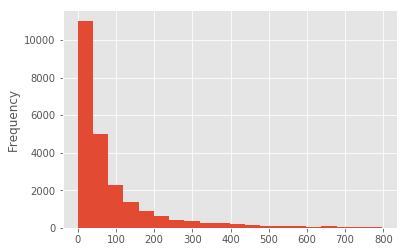

In [21]:
user_group.sum().query('order_price<800')['order_price'].plot.hist(bins=20)
plt.show()

In [22]:
price_counts = pd.DataFrame(pd.cut(user_group.sum().query('order_price<800').order_price,bins=20).value_counts())
price_counts['percent'] = price_counts.order_price/price_counts.order_price.sum()
price_counts.head()

,order_price,percent
"(-0.797, 39.856]",11027,0.474076
"(39.856, 79.711]",4981,0.214144
"(79.711, 119.567]",2263,0.097291
"(119.567, 159.422]",1391,0.059802
"(159.422, 199.278]",889,0.038220


In [23]:
price_counts[:3].sum()

order_price    18271.000000
percent            0.785512
dtype: float64

In [24]:
price_counts[5:].sum()

order_price    2709.000000
percent           0.116466
dtype: float64

由上可知：
- 大部分用户的消费能力并不高，将近半数的用户消费金额不超过40元，高消费用户（ >200元 ）不超过3000人

### 6.7 用户消费数量分析

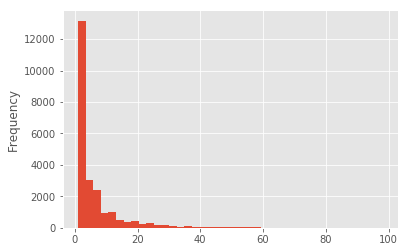

In [25]:
user_group.sum().query('order_number<100').order_number.plot.hist(bins=40)
plt.show()

In [26]:
number_counts = pd.DataFrame(user_group.sum().query('order_number<100').order_number.value_counts())
number_counts['percent'] = number_counts.order_number/number_counts.order_number.sum()
number_counts.head(10)

,order_number,percent
1,6809,0.289856
2,3933,0.167426
3,2425,0.103231
4,1731,0.073688
5,1314,0.055936
6,973,0.041420
7,761,0.032395
8,655,0.027883
9,510,0.021710
10,432,0.018390


In [27]:
number_counts[:3].sum()

order_number    13167.000000
percent             0.560513
dtype: float64

In [28]:
number_counts.tail(10)

,order_number,percent
89,3,0.000128
63,3,0.000128
95,3,0.000128
88,2,0.000085
73,1,0.000043
84,1,0.000043
91,1,0.000043
93,1,0.000043
80,1,0.000043
94,1,0.000043


In [29]:
number_counts.query('index > 10').sum()

order_number    3948.000000
percent            0.168064
dtype: float64

由上可知：
- 29%的用户只购买了一件商品；
- 56%的用户购买的数量在3张CD以内
- 17%的用户购买了10张以上的CD

### 6.8 用户消费周期分析

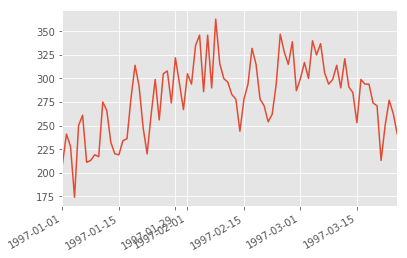

In [30]:
# 首单的日期分布
user_group.order_date.min().value_counts().plot()
plt.show()

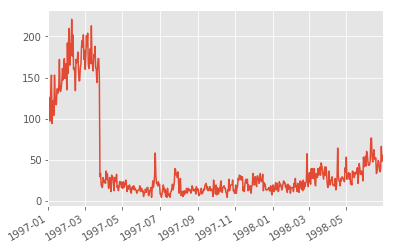

In [31]:
# 最后一次消费的日期分布
user_group.order_date.max().value_counts().plot()
plt.show()

In [32]:
# 用户的生命周期分布
user_life = pd.DataFrame(user_group.order_date.agg(['min','max']))
user_life['life'] = (user_life['max']-user_life['min']).dt.days +1
user_life_sum = pd.DataFrame(user_life.life.value_counts())
user_life_sum['percent'] = user_life_sum['life']/user_life_sum['life'].sum()
user_life_sum.sort_index().head()


,life,percent
1,12054,0.511413
2,76,0.003224
3,49,0.002079
4,44,0.001867
5,38,0.001612


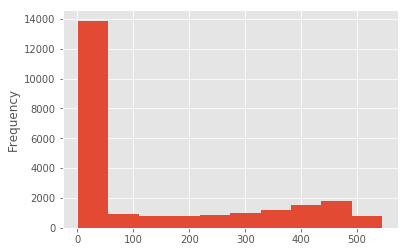

In [33]:
user_life.life.plot.hist(bins = 10)
plt.show()

由上可知：
- 首单基本都分布在前三个月
- 最后一单的消费时间分布跨度较大，但大部分也集中在前三个月
- 超过五成(51%)的用户生命周期只有一天，猜测这部分用户是由促销活动吸引来的

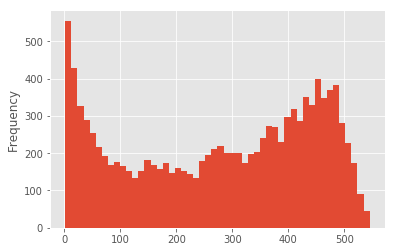

In [34]:
# 将生命周期为1天的用户剔除后再绘图
user_life.query('life > 1').life.plot.hist(bins = 50)
plt.show()

由上图可知：
- 用户生命周期呈现双峰趋势，20天内是一个高峰，400-500天是另一个高峰
- 根据此情况，应该在20天内对用户进行消费习惯的培养，延长其生命周期；

### 6.9 用户分层
### 6.9.1 构建RFM模型对用户进行分层
为了进行精细化运营，可以利用RMF模型对用户价值指数（衡量历史到当前用户贡献的收益）进行计算，其中：

R：表示最近一次消费，客户最近一次交易时间的间隔。R值越大，表示客户交易发生的日期越久，反之则交易发生的日期越近；

F：表示消费频率，客户在最近一段时间内交易的次数。F值越大，表示客户交易越频繁，反之则表示客户交易不够活跃；

M：表示消费金额，客户在最近一段时间内交易的金额。M值越大，表示客户价值越高，反之则表示客户价值越低。

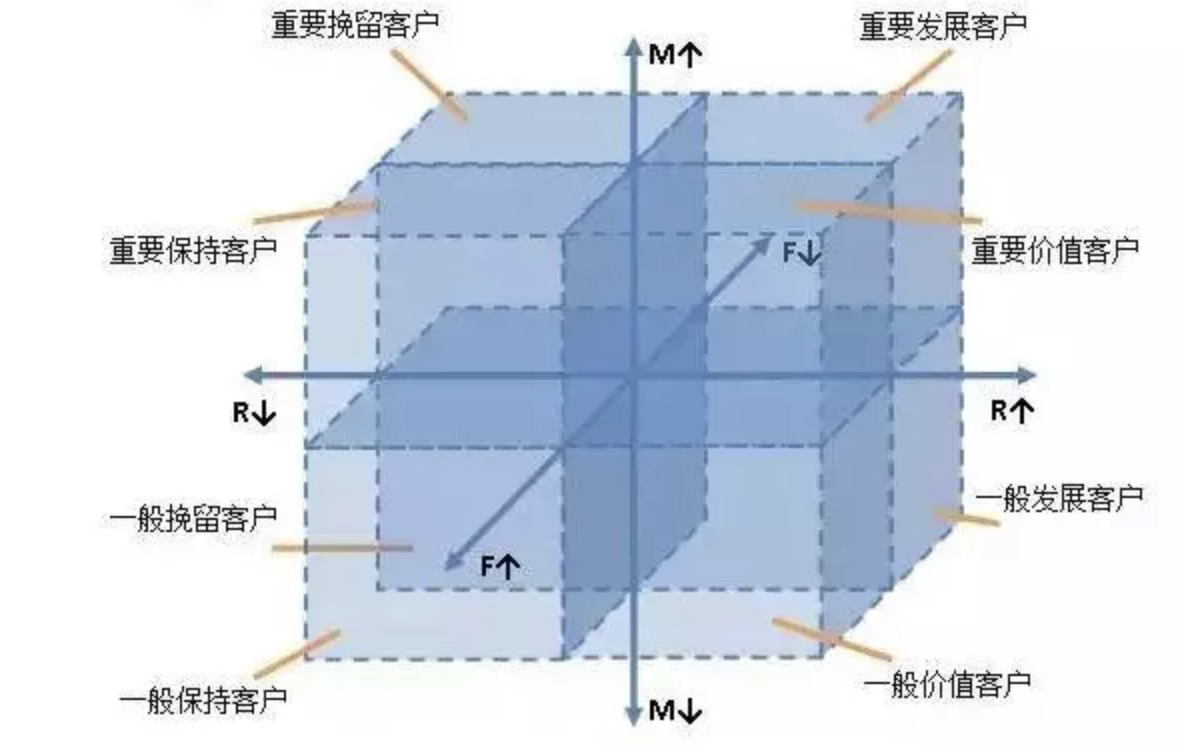

In [35]:
rfm = df.pivot_table(index = 'user_id',
               values = ['order_price','order_number','order_date'],
               aggfunc = {'order_price':'sum',
                                'order_number':'sum',
                                'order_date':'max'
                               })

In [36]:
# 日期的最大值与当前日期的差值为R
rfm['R'] = (rfm['order_date'].max() - rfm['order_date']).dt.days 
# 现在距离当时已经很远了，故用最后一次消费时间代替当前日期
rfm.rename(columns = {'order_price':'M','order_number':'F'},inplace=True)
rfm.head()

,order_date,F,M,R
user_id,,,,
1,1997-01-01,1,11.77,545
2,1997-01-12,6,89.00,534
3,1998-05-28,16,156.46,33
4,1997-12-12,7,100.50,200
5,1998-01-03,29,385.61,178


In [37]:
# 构建RFM模型函数
def get_rfm(x):
    level = x.apply(lambda x :'1' if x >= 0 else '0')
    label = level.R + level.F + level.M
    d = {
        '111':'重要价值客户',
        '011':'重要保持客户',
        '101':'重要挽留客户',
        '001':'重要发展客户',
        '110':'一般价值客户',
        '010':'一般保持客户',
        '100':'一般挽留客户',
        '000':'一般发展客户'
    }
    result = d[label]
    return result

In [38]:
rfm['label'] = rfm[['R','F','M']].apply(lambda x:((x-x.mean())/x.std())).apply(get_rfm,axis=1)
rfm.head()

,order_date,F,M,R,label
user_id,,,,,
1,1997-01-01,1,11.77,545,一般挽留客户
2,1997-01-12,6,89.00,534,一般挽留客户
3,1998-05-28,16,156.46,33,重要保持客户
4,1997-12-12,7,100.50,200,一般发展客户
5,1998-01-03,29,385.61,178,重要保持客户


In [39]:
rfm.groupby('label').sum()

,F,M,R
label,,,
一般价值客户,650,7181.28,36295
一般保持客户,1712,19937.45,29448
一般发展客户,13977,196971.23,591108
一般挽留客户,29346,438291.81,6951815
重要价值客户,11121,167080.83,358363
重要保持客户,107789,1592039.62,517267
重要发展客户,2023,45785.01,56636
重要挽留客户,1263,33028.40,114482


- M列为不同层次客户的消费累计金额，“重要保持客户“的累计消费金额为159,203.62元，消费最多

In [40]:
rfm.groupby('label').size()

label
一般价值客户       77
一般保持客户      206
一般发展客户     3300
一般挽留客户    14074
重要价值客户      787
重要保持客户     4554
重要发展客户      331
重要挽留客户      241
dtype: int64

- “一般挽留客户”用户人数最多，可视具体情况判别是否实施一些活动进行挽留
- 其次为“重要保持客户”，应通过一些活动保持这部分用户的消费

### 6.9.2 按活跃程度对用户进行分层

In [41]:
df1 = df.pivot_table(index = 'user_id',
                    columns = 'month',
                    values = 'order_date',
                    aggfunc = 'count').fillna(0)
df1.head()

month,1997-01-01 00:00:00,1997-02-01 00:00:00,1997-03-01 00:00:00,1997-04-01 00:00:00,1997-05-01 00:00:00,1997-06-01 00:00:00,1997-07-01 00:00:00,1997-08-01 00:00:00,1997-09-01 00:00:00,1997-10-01 00:00:00,1997-11-01 00:00:00,1997-12-01 00:00:00,1998-01-01 00:00:00,1998-02-01 00:00:00,1998-03-01 00:00:00,1998-04-01 00:00:00,1998-05-01 00:00:00,1998-06-01 00:00:00
user_id,,,,,,,,,,,,,,,,,,
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5,2.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0


- 上表中的值为每个用户当月的消费次数，接下来对其进行简化分为两类：

    - 当月未消费--0,当月消费--1

In [42]:
df2 = df1.applymap(lambda x : 1 if x>0 else 0)
df2.tail()

month,1997-01-01 00:00:00,1997-02-01 00:00:00,1997-03-01 00:00:00,1997-04-01 00:00:00,1997-05-01 00:00:00,1997-06-01 00:00:00,1997-07-01 00:00:00,1997-08-01 00:00:00,1997-09-01 00:00:00,1997-10-01 00:00:00,1997-11-01 00:00:00,1997-12-01 00:00:00,1998-01-01 00:00:00,1998-02-01 00:00:00,1998-03-01 00:00:00,1998-04-01 00:00:00,1998-05-01 00:00:00,1998-06-01 00:00:00
user_id,,,,,,,,,,,,,,,,,,
23566,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
23567,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
23568,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
23569,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
23570,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [43]:
# 构建定义用户活跃类型的函数
def active_status(data):
    status = []
    for i in range(18):
        if data[i] == 0:
            if len(status) > 0:
                if status[i-1] == 'new':
                    status.append('inactive')
                elif status[i-1] == 'active':
                    status.append('inactive')
                elif status[i-1] == 'unregistered':
                    status.append('unregistered')
                else:
                    status.append('loss')
            else:
                status.append('unregistered')
        else:
            if len(status) == 0:
                status.append('new')
            else:
                if status[i-1] == 'new':
                    status.append('active')
                elif status[i-1] == 'return':
                    status.append('active')
                elif status[i-1] == 'unregistered':
                    status.append('new')
                elif status[i-1] == 'unregistered':
                    status.append('new')
                else:
                    status.append('return')
    return status

用户活跃类型函数定义的逻辑图如下：
- 老客连续两个月未购买，定义为流失用户：loss
- 新客：new
- 间隔一个月购买，定义为不活跃用户：inactive
- 不活跃用户以及流失用户再次购买，定义为回流用户：return
- 之前未进行购买且本月也未进行购买，定义为未注册用户：unregistered
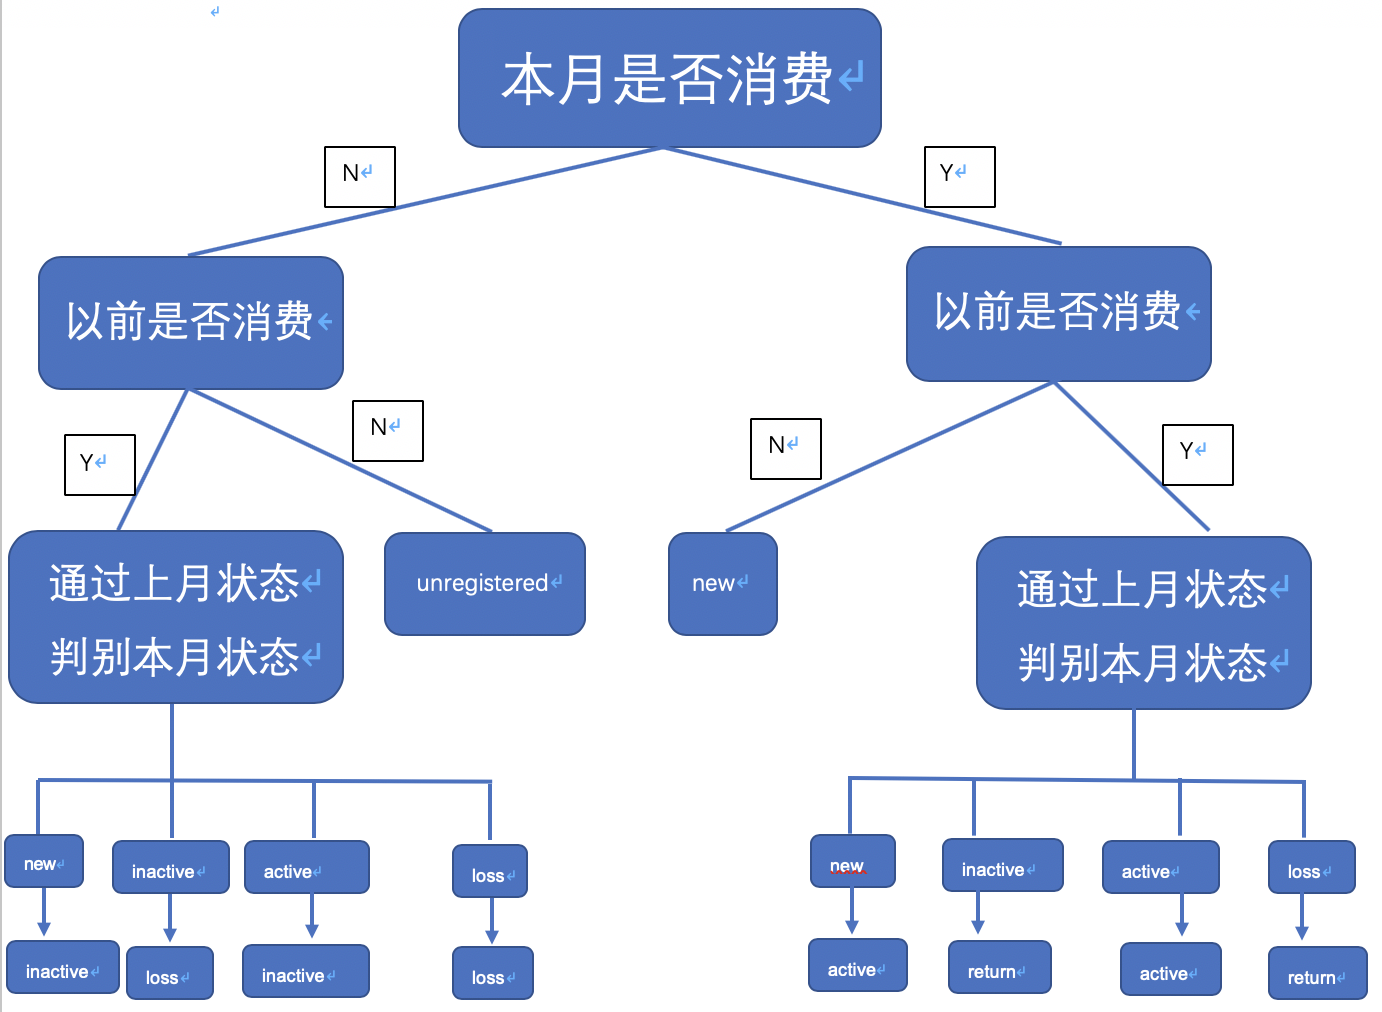

In [44]:
df3 = df2.apply(lambda x:pd.Series(active_status(x),index = df2.columns),axis = 1)
df3.tail()

month,1997-01-01 00:00:00,1997-02-01 00:00:00,1997-03-01 00:00:00,1997-04-01 00:00:00,1997-05-01 00:00:00,1997-06-01 00:00:00,1997-07-01 00:00:00,1997-08-01 00:00:00,1997-09-01 00:00:00,1997-10-01 00:00:00,1997-11-01 00:00:00,1997-12-01 00:00:00,1998-01-01 00:00:00,1998-02-01 00:00:00,1998-03-01 00:00:00,1998-04-01 00:00:00,1998-05-01 00:00:00,1998-06-01 00:00:00
user_id,,,,,,,,,,,,,,,,,,
23566,unregistered,unregistered,new,inactive,loss,loss,loss,loss,loss,loss,loss,loss,loss,loss,loss,loss,loss,loss
23567,unregistered,unregistered,new,inactive,loss,loss,loss,loss,loss,loss,loss,loss,loss,loss,loss,loss,loss,loss
23568,unregistered,unregistered,new,active,inactive,loss,loss,loss,loss,loss,loss,loss,loss,loss,loss,loss,loss,loss
23569,unregistered,unregistered,new,inactive,loss,loss,loss,loss,loss,loss,loss,loss,loss,loss,loss,loss,loss,loss
23570,unregistered,unregistered,new,inactive,loss,loss,loss,loss,loss,loss,loss,loss,loss,loss,loss,loss,loss,loss


In [45]:
# 将unregistered替换成NaN，再用fillna(0)将空值替换成0
df4 = df3.replace('unregistered',np.NaN).apply(lambda x:pd.value_counts(x)).fillna(0).T
df4

,active,inactive,loss,new,return
month,,,,,
1997-01-01,0.0,0.0,0.0,7846.0,0.0
1997-02-01,1157.0,6689.0,0.0,8476.0,0.0
1997-03-01,1312.0,7952.0,6094.0,7248.0,964.0
1997-04-01,1340.0,7095.0,13653.0,0.0,1482.0
1997-05-01,423.0,911.0,20445.0,0.0,1791.0
1997-06-01,554.0,230.0,21001.0,0.0,1785.0
1997-07-01,488.0,296.0,21094.0,0.0,1692.0
1997-08-01,425.0,309.0,21489.0,0.0,1347.0
1997-09-01,356.0,253.0,21578.0,0.0,1383.0


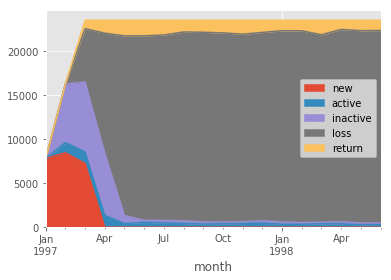

In [46]:
df4[['new','active','inactive','loss','return']].plot.area()
plt.show()

In [47]:
# 每一层用户的占比
df5 = df4.apply(lambda x:x/x.sum(),axis=1)
df5

,active,inactive,loss,new,return
month,,,,,
1997-01-01,0.000000,0.000000,0.000000,1.000000,0.000000
1997-02-01,0.070886,0.409815,0.000000,0.519299,0.000000
1997-03-01,0.055664,0.337378,0.258549,0.307510,0.040899
1997-04-01,0.056852,0.301018,0.579253,0.000000,0.062877
1997-05-01,0.017947,0.038651,0.867416,0.000000,0.075986
1997-06-01,0.023504,0.009758,0.891006,0.000000,0.075732
1997-07-01,0.020704,0.012558,0.894951,0.000000,0.071786
1997-08-01,0.018031,0.013110,0.911710,0.000000,0.057149
1997-09-01,0.015104,0.010734,0.915486,0.000000,0.058676


由上述可知：
- 新客用户：仅在前三个月有新增用户
- 活跃用户：比例总体层次呈下降趋势
- 回流用户：保持在5%左右
- 不活跃用户/流失用户：此层次用户占比极大

### 6.10 用户复购与回购分析

### 6.10.1 复购率
定义：在某时间窗口内消费两次及以上的用户在总消费用户中的占比。这里的时间窗口是月，如果一个用户在同一天下了两笔订单，这里也将算作复购用户。

In [48]:
# 计算每个用户在每个月的订单数
order_num = df.pivot_table(index = 'user_id',columns = 'month',values = 'order_date',aggfunc='count').fillna(0)
order_num.head()

month,1997-01-01 00:00:00,1997-02-01 00:00:00,1997-03-01 00:00:00,1997-04-01 00:00:00,1997-05-01 00:00:00,1997-06-01 00:00:00,1997-07-01 00:00:00,1997-08-01 00:00:00,1997-09-01 00:00:00,1997-10-01 00:00:00,1997-11-01 00:00:00,1997-12-01 00:00:00,1998-01-01 00:00:00,1998-02-01 00:00:00,1998-03-01 00:00:00,1998-04-01 00:00:00,1998-05-01 00:00:00,1998-06-01 00:00:00
user_id,,,,,,,,,,,,,,,,,,
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5,2.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0


In [49]:
# 数据转换：消费2次及以上记为1，消费1次记为0，消费0次记为NaN
order_num_trans = order_num.applymap(lambda x:1 if x > 1 else np.nan if x == 0 else 0)
order_num_trans.head()

month,1997-01-01 00:00:00,1997-02-01 00:00:00,1997-03-01 00:00:00,1997-04-01 00:00:00,1997-05-01 00:00:00,1997-06-01 00:00:00,1997-07-01 00:00:00,1997-08-01 00:00:00,1997-09-01 00:00:00,1997-10-01 00:00:00,1997-11-01 00:00:00,1997-12-01 00:00:00,1998-01-01 00:00:00,1998-02-01 00:00:00,1998-03-01 00:00:00,1998-04-01 00:00:00,1998-05-01 00:00:00,1998-06-01 00:00:00
user_id,,,,,,,,,,,,,,,,,,
1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN
4,1.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
5,1.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,NaN,NaN,1.0,0.0,NaN,NaN,NaN,NaN,NaN


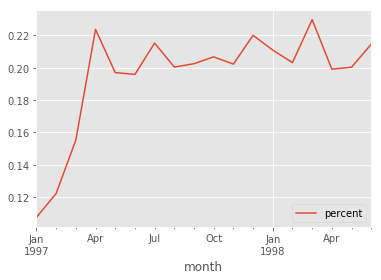

In [50]:
# 计算每个月份复购率
repeat_order = pd.DataFrame(order_num_trans.sum()/order_num_trans.count(),columns=['percent'])
repeat_order.plot()
plt.show()

- 用户的复购率稳定在21%左右

### 6.10.2 回购率
定义：某一个时间窗口内消费的用户，在下一个时间窗口仍旧消费的占比。

In [51]:
# 计算每个用户每个月的平均消费金额
order_avg = df.pivot_table(index = 'user_id',columns = 'month',values = 'order_price',aggfunc = 'mean').fillna(0)

columns_month = df.month.sort_values().astype('str').unique()
order_avg.columns = columns_month
order_avg.head()

,1997-01-01,1997-02-01,1997-03-01,1997-04-01,1997-05-01,1997-06-01,1997-07-01,1997-08-01,1997-09-01,1997-10-01,1997-11-01,1997-12-01,1998-01-01,1998-02-01,1998-03-01,1998-04-01,1998-05-01,1998-06-01
user_id,,,,,,,,,,,,,,,,,,
1,11.77,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.000,0.000,0.00,0.0,0.0,0.0,0.00,0.0
2,44.50,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.000,0.000,0.00,0.0,0.0,0.0,0.00,0.0
3,20.76,0.0,20.76,19.54,0.00,0.00,0.00,0.00,0.00,0.0,39.205,0.000,0.00,0.0,0.0,0.0,16.99,0.0
4,29.53,0.0,0.00,0.00,0.00,0.00,0.00,14.96,0.00,0.0,0.000,26.480,0.00,0.0,0.0,0.0,0.00,0.0
5,21.65,38.9,0.00,45.55,38.71,26.14,28.14,0.00,40.47,0.0,0.000,43.465,37.47,0.0,0.0,0.0,0.00,0.0


In [52]:
# 数据转换：将有消费记录记为1，没有消费记录记为0
back_purchase = order_avg.applymap(lambda x:1 if x > 0 else 0)
back_purchase.head()

,1997-01-01,1997-02-01,1997-03-01,1997-04-01,1997-05-01,1997-06-01,1997-07-01,1997-08-01,1997-09-01,1997-10-01,1997-11-01,1997-12-01,1998-01-01,1998-02-01,1998-03-01,1998-04-01,1998-05-01,1998-06-01
user_id,,,,,,,,,,,,,,,,,,
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
5,1,1,0,1,1,1,1,0,1,0,0,1,1,0,0,0,0,0


In [53]:
def back_purchase_rate(data):
    status = []
    for i in range(17):
        if data[i] == 1:
            if data[i+1] ==1:
                status.append(1)
            if data[i+1] == 0:
                status.append(0)
        else:
            status.append(np.nan)
    status.append(np.nan)
    return pd.Series(status,index = columns_month)

back_purchase_trans = back_purchase.apply(back_purchase_rate,axis=1)
back_purchase_trans.head()

,1997-01-01,1997-02-01,1997-03-01,1997-04-01,1997-05-01,1997-06-01,1997-07-01,1997-08-01,1997-09-01,1997-10-01,1997-11-01,1997-12-01,1998-01-01,1998-02-01,1998-03-01,1998-04-01,1998-05-01,1998-06-01
user_id,,,,,,,,,,,,,,,,,,
1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.0,NaN,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN
4,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
5,1.0,0.0,NaN,1.0,1.0,1.0,0.0,NaN,0.0,NaN,NaN,1.0,0.0,NaN,NaN,NaN,NaN,NaN


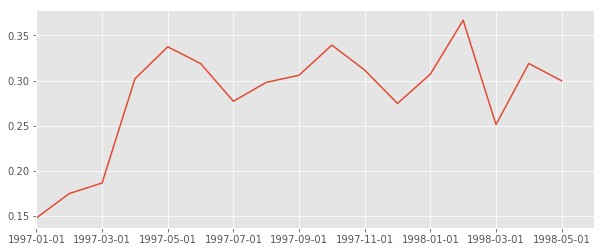

In [54]:
back_purchase_rate = back_purchase_trans.sum()/back_purchase_trans.count()
back_purchase_rate.plot(figsize=(10,4))
plt.show()

- 用户的回购率稳定在30%左右

*从复购率和回购率的两张图可以看出新客的表现都不如老客，故在前三个月内应使用合理的营销策略引导消费者养成消费习惯，加强其忠诚度。*

# 七、结论
1. 整体趋势：每年的销量和销售额在1-3月份相对极高，然后骤降，原因可能跟这段时间的大力促销或者新品发售有关；
2. 用户个体特征：每笔订单的金额和商品购买量都集中在区间的低段水平，都是小金额小批量进行购买，此类交易群体，可在丰富产品线和增加促销活动提高转换率和购买率；
3. 用户的生命周期：有二次及以上消费的用户的平均生命周期是276天。用户的生命周期分别在20天内与400至500天间，应该在20天内对客户进行引导，促进其再次消费并形成消费习惯，延长其生命周期；在100至400天的用户，也要根据其特点推出有针对性的营销活动，引导其持续消费；
4. 新客户的复购率约为6%，老客户的复购率在20%左右；新客户的回购率在15%左右，老客户的回购率在30%左右，需要营销策略积极引导其再次消费及持续消费